## Calibrate Projection Function
This worksheet shows how to calibrate the lens projection function for specific lens. Each lens type is assumed to be unique, so this calibration should be done only once (or can be taken from a table of previous calibrated values).

The calibration procedure is taken from the [CAN-EYE user guide](http://www6.paca.inra.fr/can-eye/Documentation-Publications/Documentation) and requires taking 2 pictures from slightly different distances to the setup. 

Alternatively, one can use a single image from a (much) larger calibration setup, eg a ruler on the ceiling and across the side walls, and then the projection function calculation is straightforward from trigonomtrie.

The point coordinates can measured manually eg. with [paint.net](http://www.getpaint.net) or with the ImageView package in Julia.

Note the coordinates (x,y) according to standard image coordinates, which are different from normal cartesian (right handed) coordinates because it start on the upper left on the image.

The upper left pixel of the image is (1,1), the lower left is (1, height) and upper right pixel then (width,1).

The input data is a DataFrame with 4 columns:
- cm: measurement point on the physical ruler in the picture
- px: x coordinate of the corresponding pixel (y-coordinates of lens center are all identical)
- H: estimation of distance lens to setup for each of the 2 pictures
- pos: either "left", "right" or "perpendicular" to specify ruler.

Further inputs are the width and height of the pictures.

The outputs are the parameters $(a,b)$ for the quadratic projection function $\rho(\theta) = a\theta + b\theta^2$ with $\rho$ between [0, $\rho_{\text{max}}$] and $\theta$ between [0, $\pi/2$]. 

You can simply divide by the maximum radius $\rho_{\text{max}}$ to get a projection function in the interval [0, 1] that can be used generically with different camera's (that have different maximum radius in pixels).

In [1]:
using DataFrames

In [2]:
df = readtable("lenscalibration.csv", names=[:cm, :px, :H, :pos])

,cm,px,H,pos
1,19,1405,20,left
2,18,1460,20,left
3,17,1518,20,left
4,16,1572,20,left
5,15,1632,20,left
6,14,1688,20,left
7,13,1745,20,left
8,12,1799,20,left
9,11,1850,20,left
10,10,1897,20,left


In [4]:
#Pkg.clone("https://github.com/ETC-UA/LeafAreaIndex.jl")
using LeafAreaIndex

(H1,H2) = extrema(df[:H]) => (20,25)

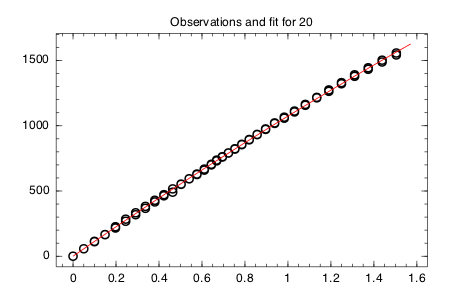

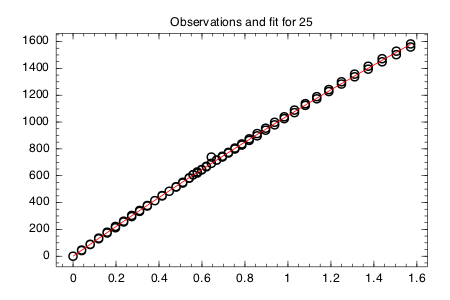


Δ => 5.640400442887511
H => 21.171779783322492
(a,b) => (1195.0521290928646,-66.51257899773492)


(1195.0521290928646,-66.51257899773492)

In [6]:
heigth = 4020
width  = 6036
calibrate_projfun(df, heigth, width)